<a href="https://colab.research.google.com/github/SatLight/Statistical-Analysis-of-Rio-Olympics/blob/main/RioOlympics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


  ### **Exploring the 2016 Rio Olympics dataset**
 
 
Can we guess the sport being played based on the physical properties of the athlete?
Based on very simple techniques and using only **height**, **weight** and **age**, We will try to see if we can guess whether athletes are **football**, **basketball** or **volleyball** players.

In [ ]:
# %cd '/content/drive/My Drive/'

/content/drive/My Drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight')
import scipy.stats as stats
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


The first five rows of the olympics data are shown below. We have 11.5K rows and 11 columns. Variables include Name,Nationality,Sex,  Age,Height,Weight of the athlete, sport. In addition, the data captures the medal won (if any) by the athlete.

In [2]:
# Read in the data set
athletes = pd.read_csv("DATA/athletes.csv")
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
athletes.shape

(11538, 11)

 # Data exploration
 
  ## **A.**  Missing Values

### 1. Changing the NAN values in the categorical column with previous values

In [ ]:
#change NaN with previous value
'''def save_prev_change_next(cell):
    global clean_prev_val
    if (cell == "" or cell == "NaN" or cell == "nan"):
        cell = clean_prev_val
        return cell
    clean_prev_val = cell
    return cell

athletes = pd.read_csv("DATA/athletes.csv",converters ={
    'sport' :save_prev_change_next,
    'sex' :save_prev_change_next,
    'nationality' :save_prev_change_next, 
    })
athletes.head()
'''

'def save_prev_change_next(cell):\n    global clean_prev_val\n    if (cell == "" or cell == "NaN" or cell == "nan"):\n        cell = clean_prev_val\n        return cell\n    clean_prev_val = cell\n    return cell\n\nathletes = pd.read_csv("athletes.csv",converters ={\n    \'sport\' :save_prev_change_next,\n    \'sex\' :save_prev_change_next,\n    \'nationality\' :save_prev_change_next, \n    })\nathletes.head()\n'

Printing column wise missing values we get-

## 2. Interpolation of immediate data before and after it **

In [ ]:
#athletes = athletes['dob'].interpolate(method = 'linear', limit_direction = 'backward')

print(athletes.isnull().sum())

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64


# 3. Replacing the data in numeric columns with the mean

After compiling again, We find that height, weight and Age have a lot of missing values.*Lets fill the missing values of Height and Weight by the mean of the same column*

In [ ]:
athletes['height'].fillna(athletes.height.mean(), inplace = True)
athletes['weight'].fillna(athletes.weight.mean(), inplace = True)

In [ ]:
print(athletes.isnull().sum())

id             0
name           0
nationality    0
sex            0
dob            1
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
dtype: int64


 # C. Exploratory Data Analysis

## Create the age feature:

> We will take the male athletes population due to their higher variance which would hopefully make the task slightly easier
Now let's examine the height-weight scatter of Volleyball, Basketball and Football (Soccer) players

> Football players are noticeably much smaller and quite separable. Basketball players are on average bigger than Vollyball players but the populations are not easily separable.

 Age as feature


In [5]:
athletes.head(4)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0


In [6]:
for i,row in enumerate(athletes.iterrows()):
    try:
        athletes.loc[i,'age'] = 116 - float(row[1].dob[len(row[1].dob)-2:len(row[1].dob)])
    except TypeError:
        athletes.loc[i,'age'] = 0
        

In [7]:
athletes

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,47.0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,30.0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0,21.0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0,30.0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0,25.0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0,27.0


Let's separate males and females for simplicity (to avoid confusion caused by variance between men and women).

In [8]:
males = athletes[athletes.sex == 'male']
females = athletes[athletes.sex == 'female']

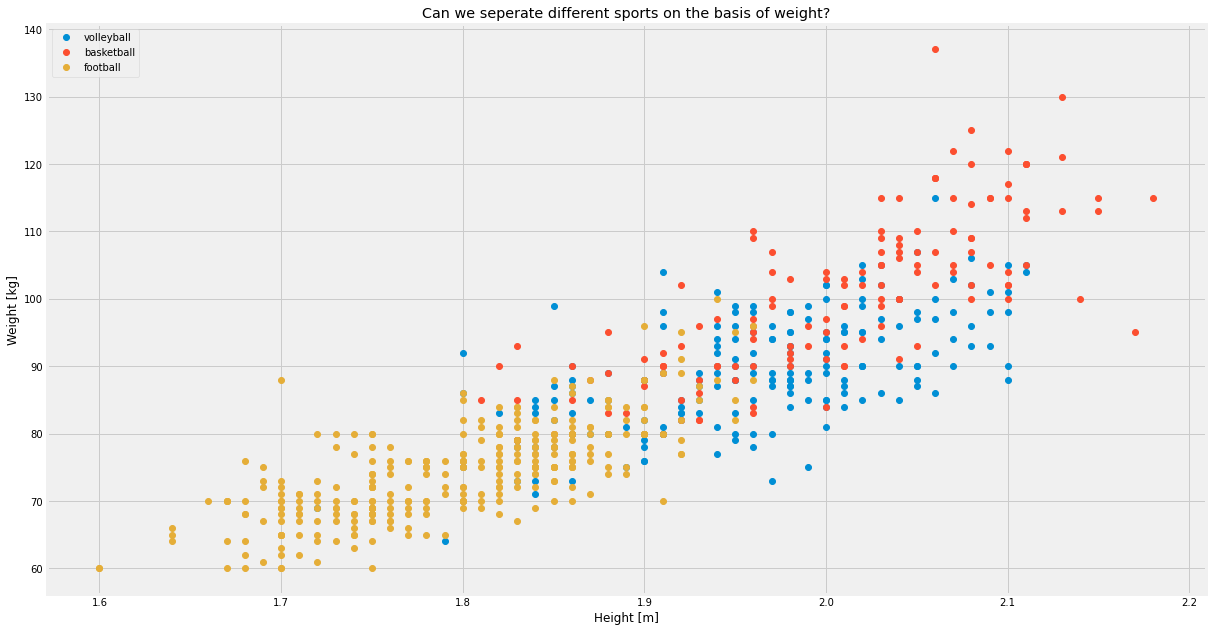

In [9]:
legend = []
sports = ['volleyball','basketball','football']
for sport in sports:
    plt.plot(males.height[males.sport == sport],males.weight[males.sport == sport], 'o')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    legend.append(sport)
    
   
plt.legend(legend, loc = 2,numpoints=1)
plt.title('Can we seperate different sports on the basis of weight?')
plt.xlabel('Height [m]')
plt.ylabel('Weight [kg]')
plt.show()

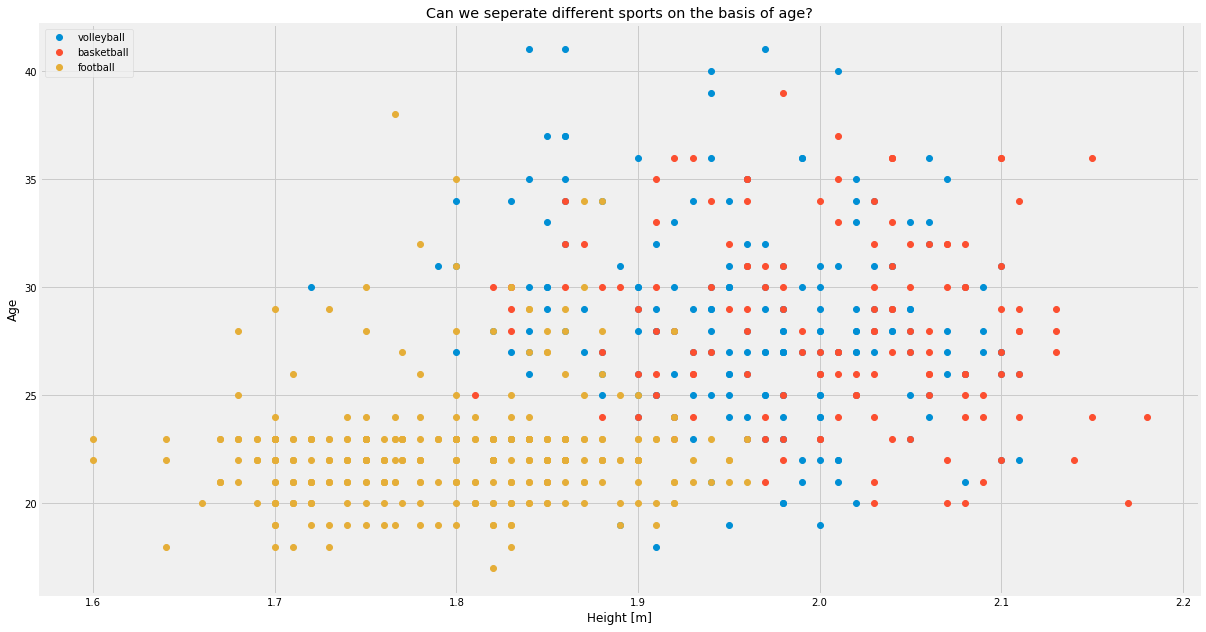

In [ ]:
legend = []
sports = ['volleyball','basketball','football']
for sport in sports:
    plt.plot(males.height[males.sport == sport],males.age[males.sport == sport], 'o')
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    legend.append(sport)
    
plt.legend(legend, loc = 2,numpoints=1)
plt.title('Can we seperate different sports on the basis of age?')
plt.xlabel('Height [m]')
plt.ylabel('Age')
plt.show()

In [ ]:
# As expected the NaNs in the 'Height' and 'Weight' column disappear!
print(athletes.isnull().sum())

id             0
name           0
nationality    0
sex            0
dob            1
height         0
weight         0
sport          0
gold           0
silver         0
bronze         0
age            0
dtype: int64


# B. Normalising the Numeric fields

In [10]:
#normalising the numeric columns
athletes["height"] =(athletes["height"]-athletes["height"].mean())/athletes["height"].std()
athletes["weight"] =(athletes["weight"]-athletes["weight"].mean())/athletes["weight"].std()
print(athletes.head())

          id            name nationality     sex       dob    height  \
0  736041664  A Jesus Garcia         ESP    male  10/17/69 -0.410598   
1  532037425      A Lam Shin         KOR  female   9/23/86 -0.765464   
2  435962603     Aaron Brown         CAN    male   5/27/92  1.896029   
3  521041435      Aaron Cook         MDA    male    1/2/91  0.565282   
4   33922579      Aaron Gate         NZL    male  11/26/90  0.387849   

     weight      sport  gold  silver  bronze   age  
0 -0.498735  athletics     0       0       0  47.0  
1 -0.993254    fencing     0       0       0  30.0  
2  0.428488  athletics     0       0       1  24.0  
3  0.490303  taekwondo     0       0       0  25.0  
4 -0.066031    cycling     0       0       0  26.0  


/home/turo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/turo/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


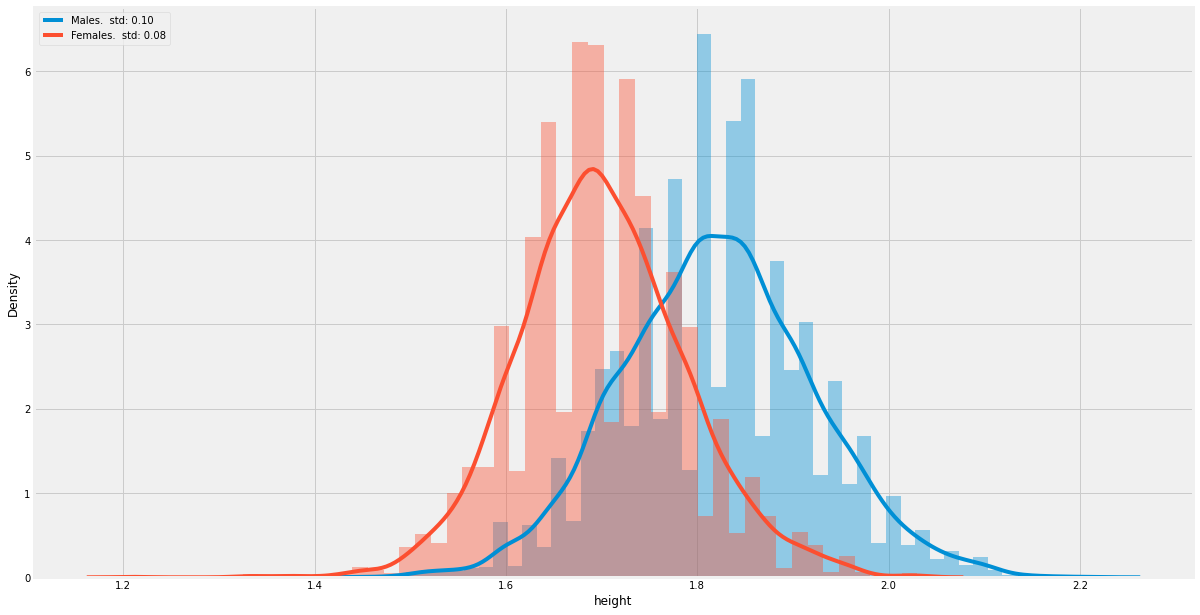

In [11]:

sns.distplot(males.height[males.age>0], hist = True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
sns.distplot(females.height[females.age>0], hist = True)
plt.legend(['Males.  std: ' + str(np.std(males.height))[:4],'Females.  std: ' + str(np.std(females.height))[:4]], loc = 2)

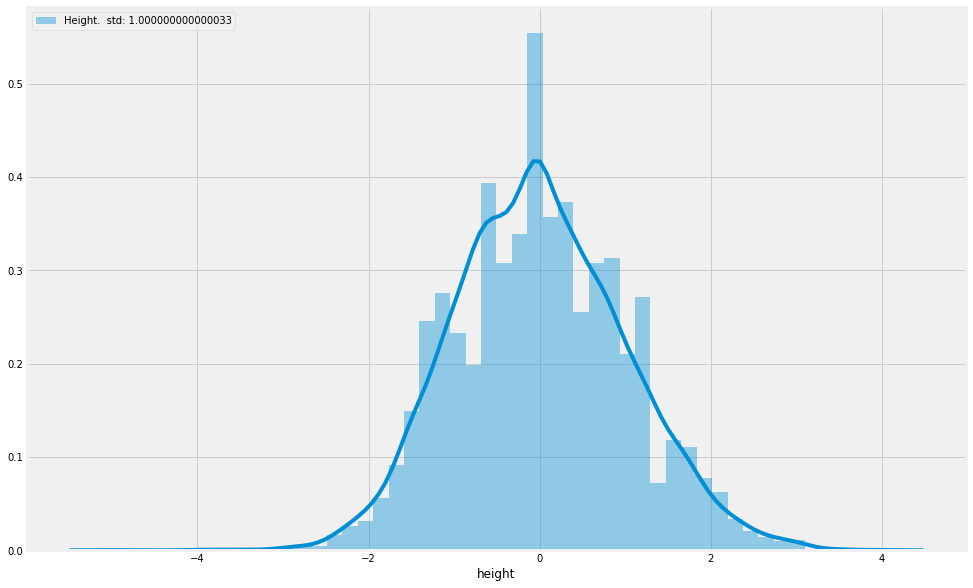

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(athletes["height"], hist = True)
plt.legend(['Height.  std: ' + str(athletes["height"].std())],loc = 2)


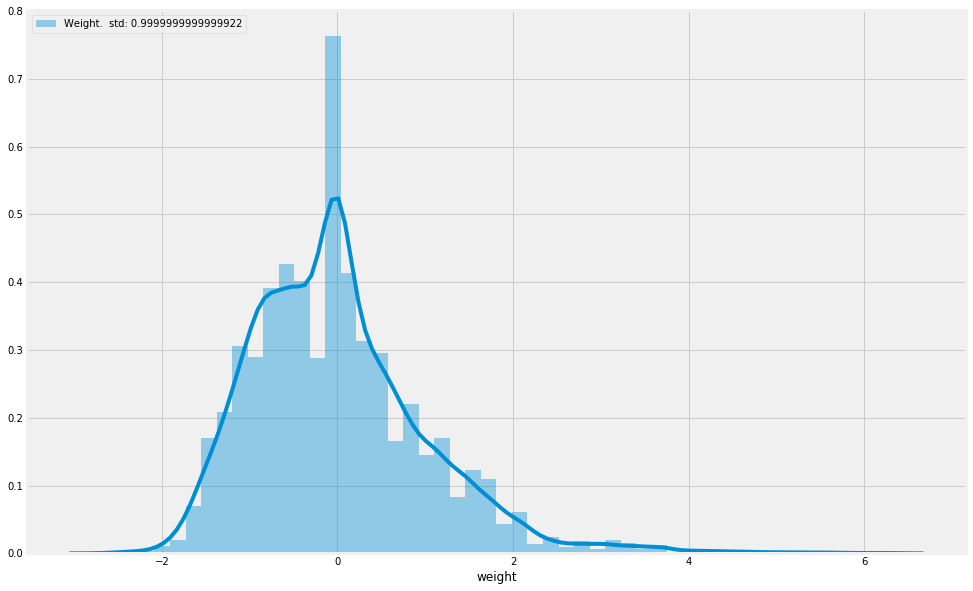

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(athletes["weight"], hist = True)
plt.legend(['Weight.  std: ' + str(athletes["weight"].std())],loc = 2)

##  Age further separates the football players which seem to be younger on average.

Lets add No of medal won b the athlehes

In [ ]:
athletes['medals'] = athletes['gold'] + athletes['silver'] + athletes['bronze']
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age,medals
0,736041664,A Jesus Garcia,ESP,male,10/17/69,-0.416600,-0.513620,athletics,0,0,0,47.0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,-0.776652,-1.022898,fencing,0,0,0,30.0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.923741,0.441276,athletics,0,0,1,24.0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,0.573545,0.504936,taekwondo,0,0,0,25.0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,0.393518,-0.068002,cycling,0,0,0,26.0,0


create new dataframes for male and female athletes who won at least one medal

In [ ]:
df_m = athletes.copy(deep=True)
df_m = df_m.drop(df_m[df_m.sex!='male'].index)
df_m_nz = df_m.copy(deep=True)
df_m_nz = df_m_nz.drop(df_m_nz[df_m_nz.medals==0].index) # male athletes who won at least one medal
df_m_z = df_m.copy(deep=True)
df_m_z = df_m_z.drop(df_m_z[df_m_z.medals!=0].index) # male athletes who did not win any medals

df_f = athletes.copy(deep=True)
df_f = df_f.drop(df_f[df_f.sex!='female'].index)
df_f_nz = df_f.copy(deep=True)
df_f_nz = df_f_nz.drop(df_f_nz[df_f_nz.medals==0].index) # female athletes who won at least one medal
df_f_z = df_f.copy(deep=True)
df_f_z = df_f_z.drop(df_f_z[df_f_z.medals!=0].index) # female athletes who did not win any medals

## INSIGHTS

### How many athletes are per each sport?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

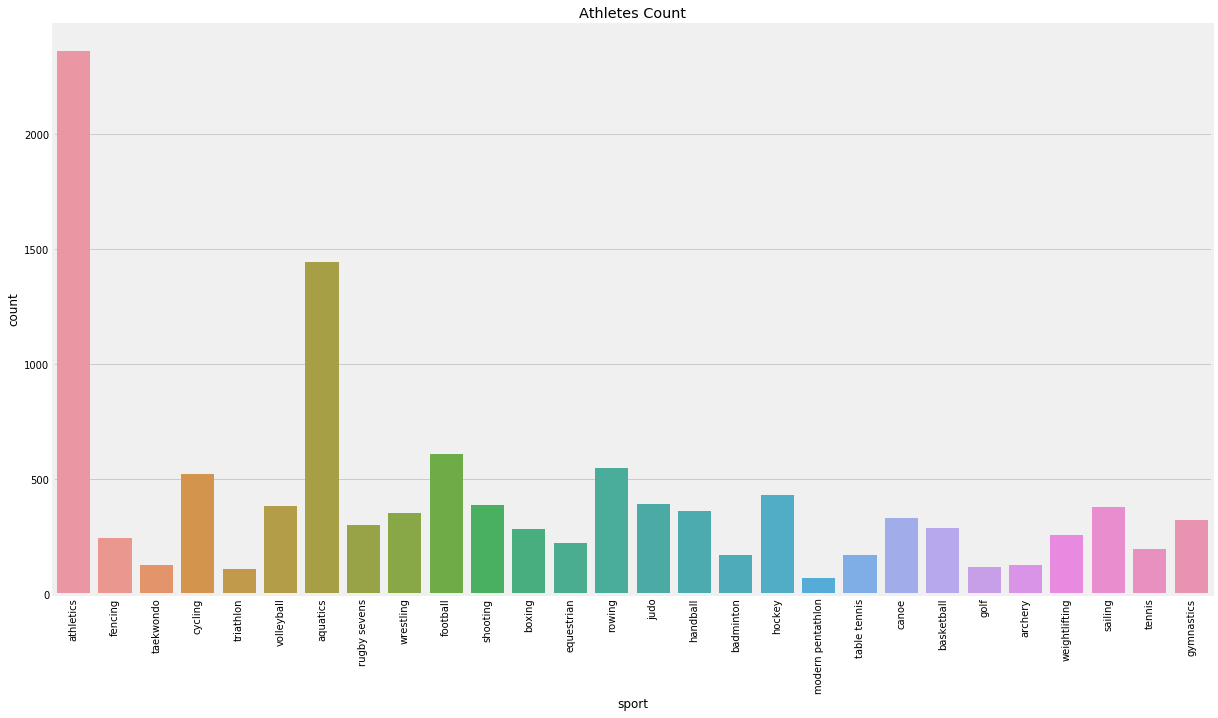

In [ ]:
athletes_count = athletes['nationality'].value_counts()
top_ten = athletes['nationality'][:10]
sns.countplot(x = 'sport', data=athletes,)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('Athletes Count')
plt.xticks(rotation=90)



### What percentage of male athletes won at least one medal?

In [ ]:
total_male_athletes = len(df_m.index)
num_male_medal = len(df_m_nz.index)
percent_m_winners = round((num_male_medal/total_male_athletes)*100,1)
percent_m_winners

15.5

### what percentage of female athletes won at least one medal?

In [ ]:
total_female_athletes = len(df_f.index)
num_female_medal = len(df_f_nz.index)
percent_f_winners = round((num_female_medal/total_female_athletes)*100,1)
percent_f_winners

16.8

### Total Male Atheletes

In [ ]:
total_male_athletes

6333

### Total Female Atheletes

In [ ]:
total_female_athletes

5205

### In which sports has a particular male athlete won 3 or more medals? 



In [ ]:
top_m = df_m[df_m.medals>=3]
top_m_sports = top_m.groupby('sport').size()
print(top_m_sports.sort_values(ascending=False))

sport
aquatics      5
gymnastics    2
athletics     2
cycling       1
canoe         1
dtype: int64


### If you are a female athlete what sports give you the best chance of winning multiple medals?

In [ ]:
top_f = df_f[df_f.medals>=3]
top_f_sports = top_f.groupby('sport').size()
print(top_f_sports.sort_values(ascending=False))

sport
aquatics      8
gymnastics    3
athletics     3
canoe         1
dtype: int64


## Countries and the Medals won

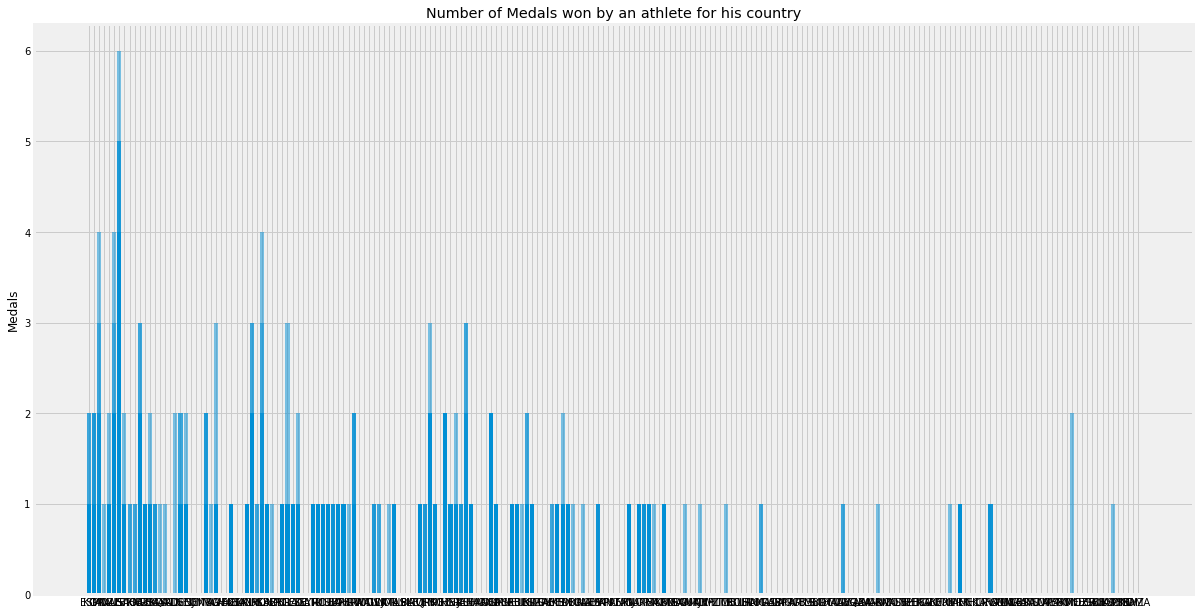

In [ ]:
plt.bar(athletes["nationality"], athletes['medals'], align='center', alpha=0.5)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylabel('Medals')
plt.title('Number of Medals won by an athlete for his country')
plt.show()

### Taking a sample

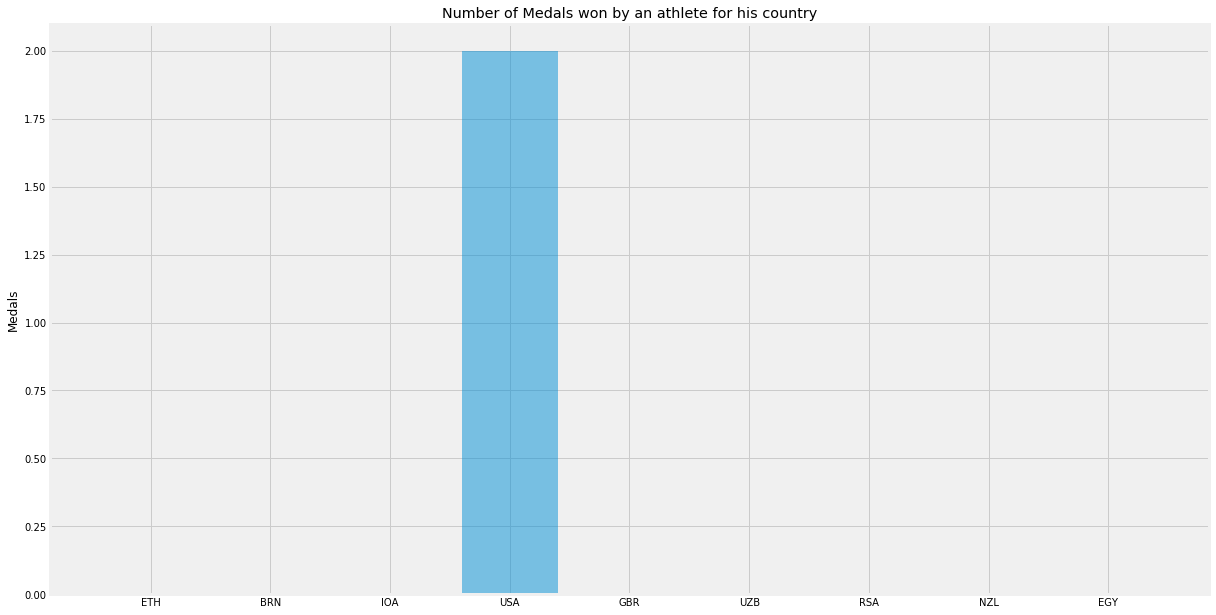

In [ ]:
plt.bar(athletes["nationality"][10:20], athletes['medals'][10:20], align='center', alpha=0.5)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.ylabel('Medals')
plt.title('Number of Medals won by an athlete for his country')
plt.show()

## Which medals

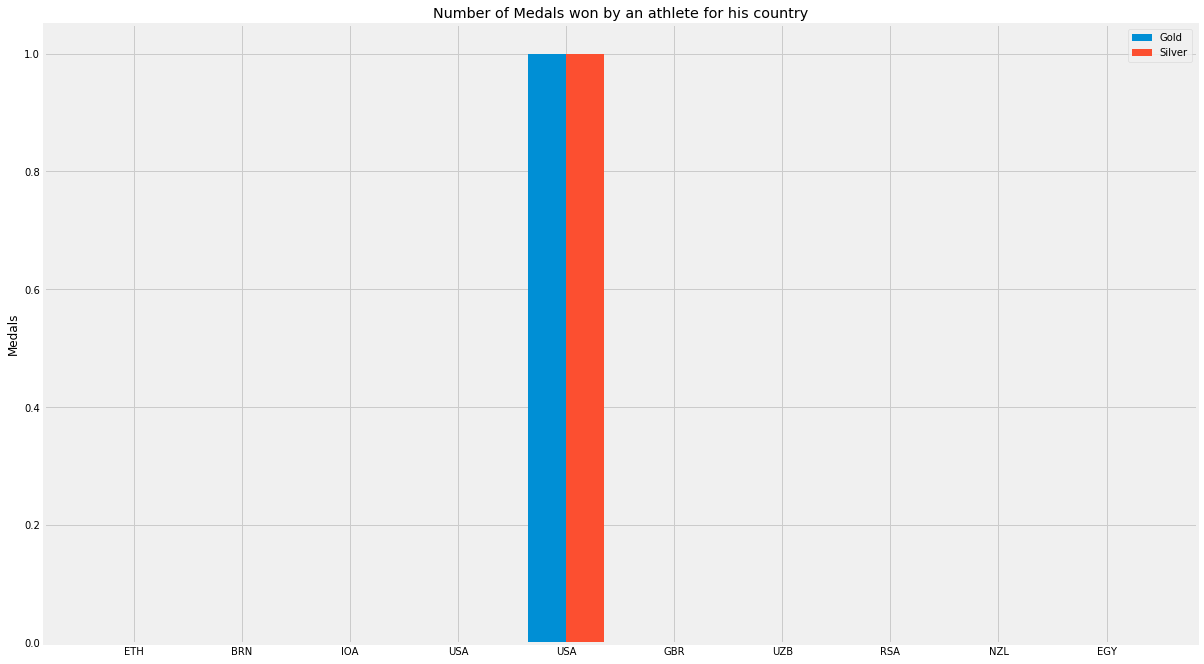

In [ ]:

labels = athletes["nationality"][10:20]
men_means = athletes["gold"][10:20]
women_means = athletes["silver"][10:20]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Gold')
rects2 = ax.bar(x + width/2, women_means, width, label='Silver')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Medals')
ax.set_title('Number of Medals won by an athlete for his country')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

# D. Hypothesis

In [ ]:
# Read in the data set
athletes2 = pd.read_csv("DATA/athletes.csv")
athletes2['height'].fillna(athletes2.height.mean(), inplace = True)
athletes2['weight'].fillna(athletes2.weight.mean(), inplace = True)
athletes2.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


## Height Without Normalisation

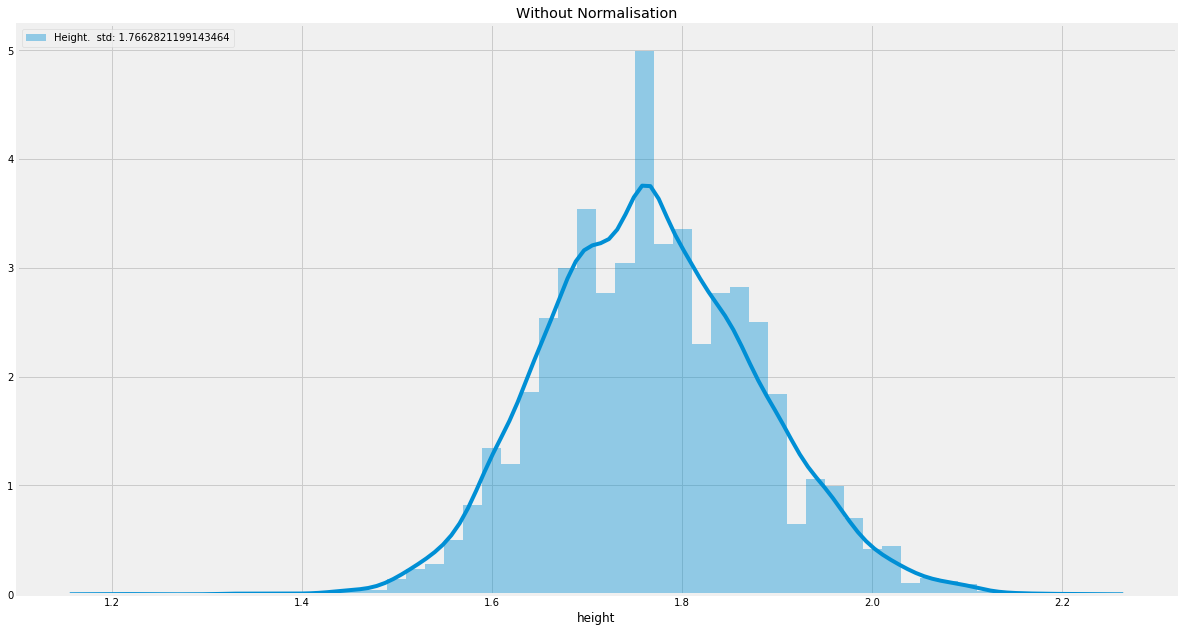

In [ ]:
sns.distplot(athletes2["height"], hist = True,)
plt.legend(['Height.  std: ' + str(athletes2["height"].mean())],loc = 2)
plt.title ("Without Normalisation")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

# With Normalisation

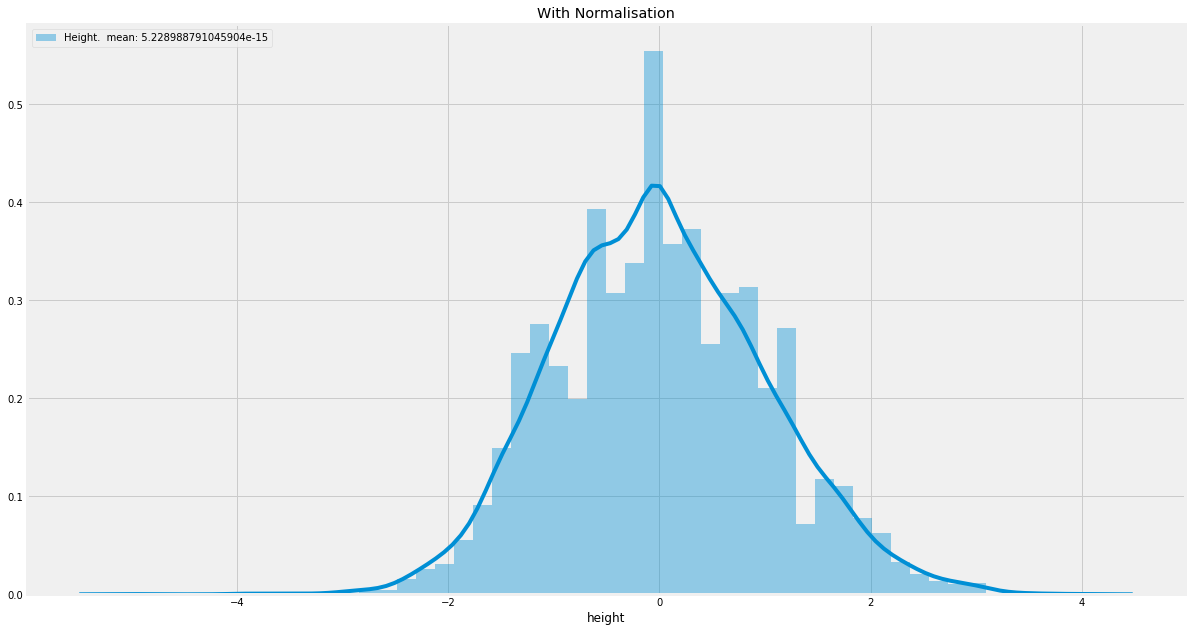

In [ ]:
normalised_height =(athletes2["height"]-athletes2["height"].mean())/athletes2["height"].std()
sns.distplot(normalised_height, hist = True)
plt.legend(['Height.  mean: ' + str(normalised_height.mean())],loc = 2)
plt.title ("With Normalisation")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

### Hypothesis Testing


#### Finding the mean and the standard deviation of the population

In [ ]:

mu = normalised_height.mean()
sigma = normalised_height.std(ddof=0)
print("population mean: ", mu, ", population sigma:", sigma)

population mean:  5.228988791045904e-15 , population sigma: 0.9999566639942924


 #### Taking a sample of 100 athletes and finding the mean and the standard deviation of their heights.

In [ ]:
sm_height = normalised_height[100:200]
s_mu = sm_height.mean()
s_sigma = sm_height.std(ddof=0)
print("sample size: ",len(sm_height) ,", sample mean: ", s_mu, ", sample sigma:", s_sigma )

sample size:  100 , sample mean:  -0.11009356486315149 , sample sigma: 0.9726496290988411


H0 : The average height of an athletes is <= 1.77m (5ft 10in).<br>
H1 : The average height of an athletes is >  1.77m 

Computing **Z TEST** <br>
Significance level = **0.05**

In [ ]:
import statsmodels.api as sm

ztest,pval= sm.stats.ztest(sm_height, value = mu, alternative = "larger")
significance_level = 0.05
significance_z_value = -1.64
print("z value:",ztest,", z score (P-value) :",pval,", significance level :",significance_level)

if pval<significance_level:
    print("Reject Null hypothesis")
    print("The average height of an athletes is > 1.77m ")
else:
    print("Accept Null hypothesis")
    print("The average height of an athletes is <= 1.77m ")


z value: -1.1262196650053116 , z score : 0.8699637241195217 , significance level : 0.05
Accept Null hypothesis
The average height of an athletes is <= 1.77m 


#### P value = 0.8699637241195217 
since **p_value > significance_level** <br>
We conculde that H0 is **Accepted** <br> H1 is **Plausible**

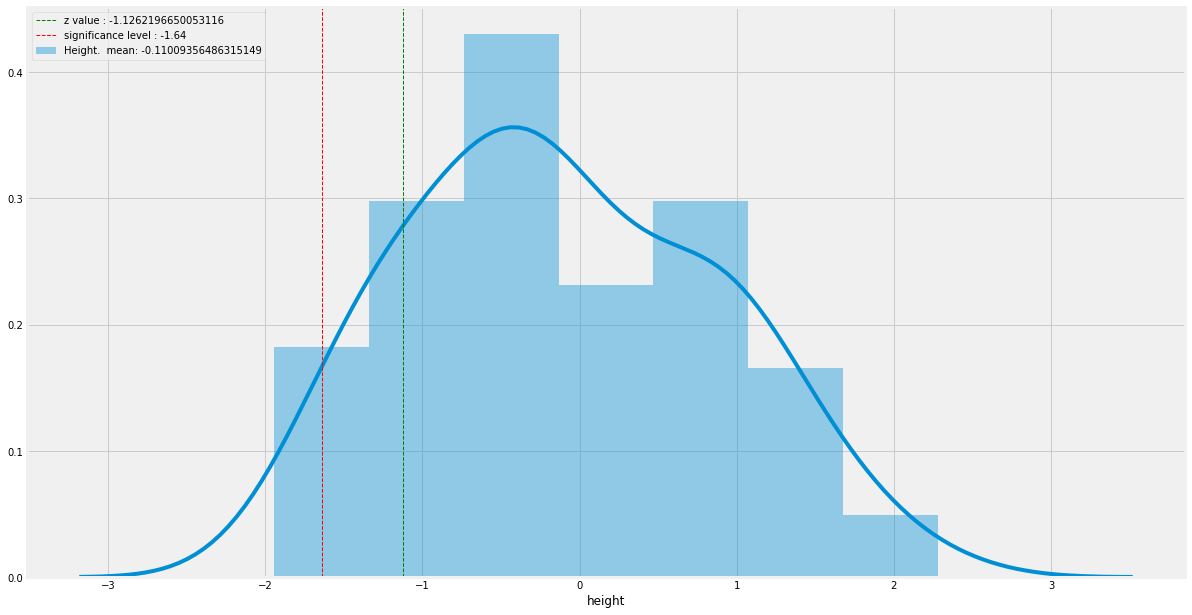

In [ ]:
sns.distplot(sm_height, hist = True)

plt.axvline(ztest, color='green', linestyle='dashed', linewidth=1)

plt.axvline(significance_z_value, color='red', linestyle='dashed', linewidth=1)
plt.legend(['z value (P value) : ' + str(float(ztest)),'significance level : ' + str(significance_z_value),'Height.  mean: ' + str(float(sm_height.mean()))],loc = 2)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

Area left to red line is **area of significance** <br>
Area left to green line is **area under p value** <br>
Since area under **p value is greater then the significance level** we conclude accepting H0;

## Correlation

In [13]:
corr = athletes.corr()
corr

,id,height,weight,gold,silver,bronze,age
id,1.000000,0.004336,0.003137,0.008290,-0.020803,0.011978,-0.011745
height,0.004336,1.000000,0.759037,0.049285,0.041002,0.020865,-0.012931
weight,0.003137,0.759037,1.000000,0.035854,0.030944,0.026113,0.009799
gold,0.008290,0.049285,0.035854,1.000000,0.024349,0.004682,0.003495
silver,-0.020803,0.041002,0.030944,0.024349,1.000000,-0.014844,-0.000121
bronze,0.011978,0.020865,0.026113,0.004682,-0.014844,1.000000,-0.001127
age,-0.011745,-0.012931,0.009799,0.003495,-0.000121,-0.001127,1.000000


In [16]:
cc = athletes[['id', 'height', 'weight', 'gold', 'age', 'sex']]
cc.head(4)

,id,height,weight,gold,age,sex
0,736041664,-0.410598,-0.498735,0,47.0,male
1,532037425,-0.765464,-0.993254,0,30.0,female
2,435962603,1.896029,0.428488,0,24.0,male
3,521041435,0.565282,0.490303,0,25.0,male


In [18]:
#sns.heatmap(cc, annot=True, fmt='.2f')

<AxesSubplot:>

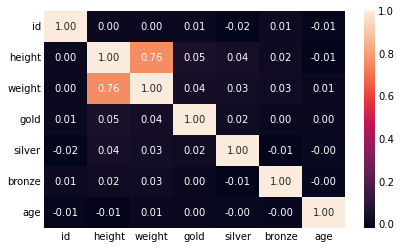

In [14]:
sns.heatmap(corr, annot=True, fmt='.2f')

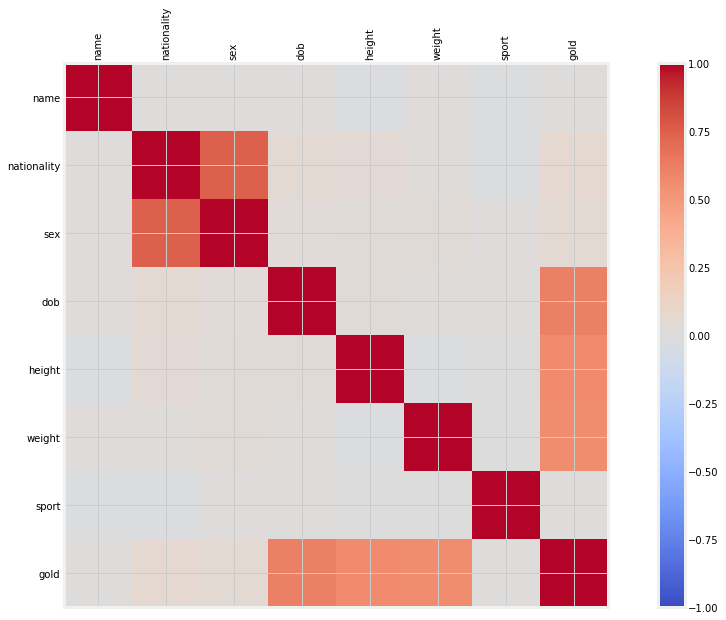

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(athletes.columns),1)
#ax.set_xticks(ticks)
plt.xticks(rotation=90)
#ax.set_yticks(ticks)
ax.set_xticklabels(athletes.columns)
ax.set_yticklabels(athletes.columns)
plt.show()

In [ ]:
print(corr)

              id    height    weight  ...    bronze       age    medals
id      1.000000  0.004274  0.003047  ...  0.011978 -0.011745  0.000143
height  0.004274  1.000000  0.748276  ...  0.020739 -0.012381  0.063840
weight  0.003047  0.748276  1.000000  ...  0.024912  0.009391  0.052290
gold    0.008290  0.049161  0.035442  ...  0.004682  0.003495  0.613288
silver -0.020803  0.040713  0.030448  ... -0.014844 -0.000121  0.564047
bronze  0.011978  0.020739  0.024912  ...  1.000000 -0.001127  0.562186
age    -0.011745 -0.012381  0.009391  ... -0.001127  1.000000  0.001379
medals  0.000143  0.063840  0.052290  ...  0.562186  0.001379  1.000000

[8 rows x 8 columns]


## If Coefficient is nearly equal to 1 it means strongly related!

 Corelation between Age and the Medals || Coefficient : 0.001379

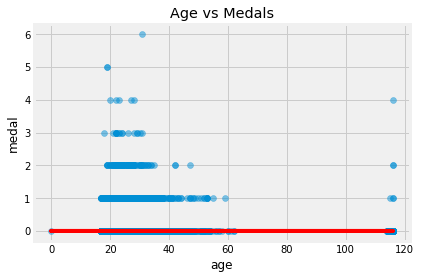

In [ ]:
plt.scatter(athletes["age"], athletes["medals"], alpha=0.5)
y_pred = athletes["medals"][0] + athletes["medals"][1]*athletes["age"]
# plotting the regression line 
plt.plot(athletes["age"], y_pred, color = "red") 
plt.title('Age vs Medals')
plt.xlabel('age')
plt.ylabel('medal')
plt.show()

## Corelation between Weight and the Gold || Coefficient : 0.035442

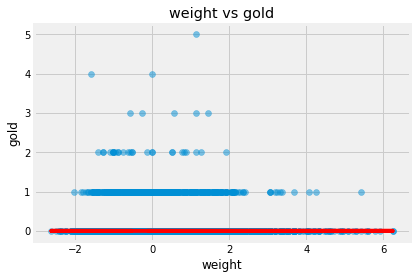

<Figure size 1332x756 with 0 Axes>

In [ ]:
plt.scatter(athletes["weight"], athletes["gold"], alpha=0.5)
y_pred = athletes["gold"][0] + athletes["gold"][1]*athletes["weight"]
# plotting the regression line 
plt.plot(athletes["weight"], y_pred, color = "red") 
plt.title('weight vs gold')
plt.xlabel('weight')
plt.ylabel('gold')
plt.show()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

## Linear Regression

Coefficients: 
 [0.74827604]
RMSE: 0.44


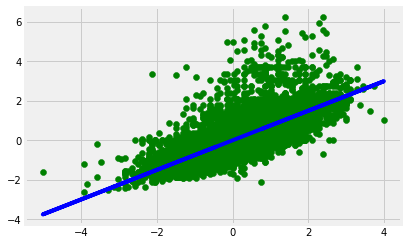

<Figure size 1332x756 with 0 Axes>

In [ ]:
from math import sqrt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as RMSE
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b,xl,yl): 
    # plotting the actual points as scatter plot 
    
    plt.scatter(x, y, 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "red") 
  
    plt.xlabel(xl)
    plt.ylabel(yl)
  
    # function to show plot 
    plt.show() 

def linear_regression(x, y):
    x = [[i] for i in x]
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(x, y)
    
    #prediction 
    y_preds = regr.predict(x)
    
    print('Coefficients: \n', regr.coef_)
    print("RMSE: %.2f" % RMSE(y, y_preds))
    
    plt.scatter(x, y,  color='green')
    plt.plot(x, y_preds, color='blue')
    plt.show()
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

x = athletes["height"]
y = athletes["weight"]
linear_regression(x, y)    
 

## Relation between height and the gold || Regression coefficient : 0.05772,0.012580

<AxesSubplot:>

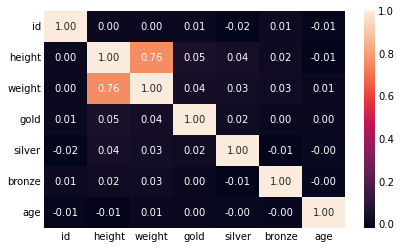

In [19]:
sns.heatmap(corr, annot=True, fmt='.2f')

Estimated coefficients:
b_0 = 0.057722308892355634  \ 
b_1 = 0.012580891824475545


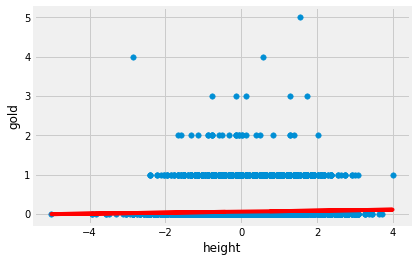

<Figure size 1332x756 with 0 Axes>

In [ ]:
   # estimating coefficients 
b = estimate_coef(athletes["height"], athletes["gold"]) 
print("Estimated coefficients:\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1])) 
  
# plotting regression line 
plot_regression_line(athletes["height"], athletes["gold"], b,"height","gold") 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

## Relation between height and the sport

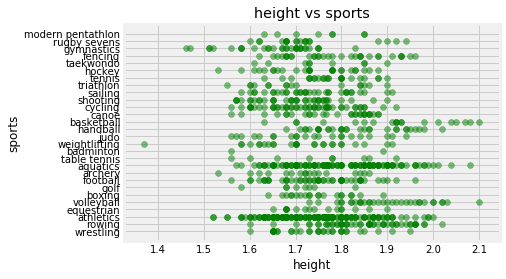

In [ ]:
plt.scatter(athletes2["height"][100:1100],athletes2["sport"][100:1100], alpha=0.5, color = 'green')
plt.title('height vs sports')
plt.xlabel('height')
plt.ylabel('sports')
plt.show()

## Correlation Using Formula

In [ ]:
from pydoc import help
from scipy.stats.stats import pearsonr
y = pearsonr(athletes["height"], athletes["weight"]) 
# put whatever columns you want over here. the function calcultes using the same formula that we
# were taught in class.
y

(0.748276044301567, 0.0)